## Student ID: 2021AIML064
## Student Name: Jagadish Yalla
# K Nearest Neighbors Project 

Welcome to the KNN Project! Go ahead and just follow the directions below.

*Get the Data [1mark]   
EDA [2marks]   
Train Test Split [1marks]  
Using KNN[1marks]  
Predictions and evaluations[2marks]  
Choosing the k value[1marks]  
Retraining with new k-value[1mark]*

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns # for Data visualization
import matplotlib.pyplot as plt # for Data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

## Get the Data
### Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
# Read data from csv file
df = pd.read_csv('KNN-Assignment.csv')


**Check the head of the dataframe.**

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742175   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [5]:
print("Row and column counts in Dataset.csv: ",df.shape)

Row and column counts in Dataset.csv:  (1000, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

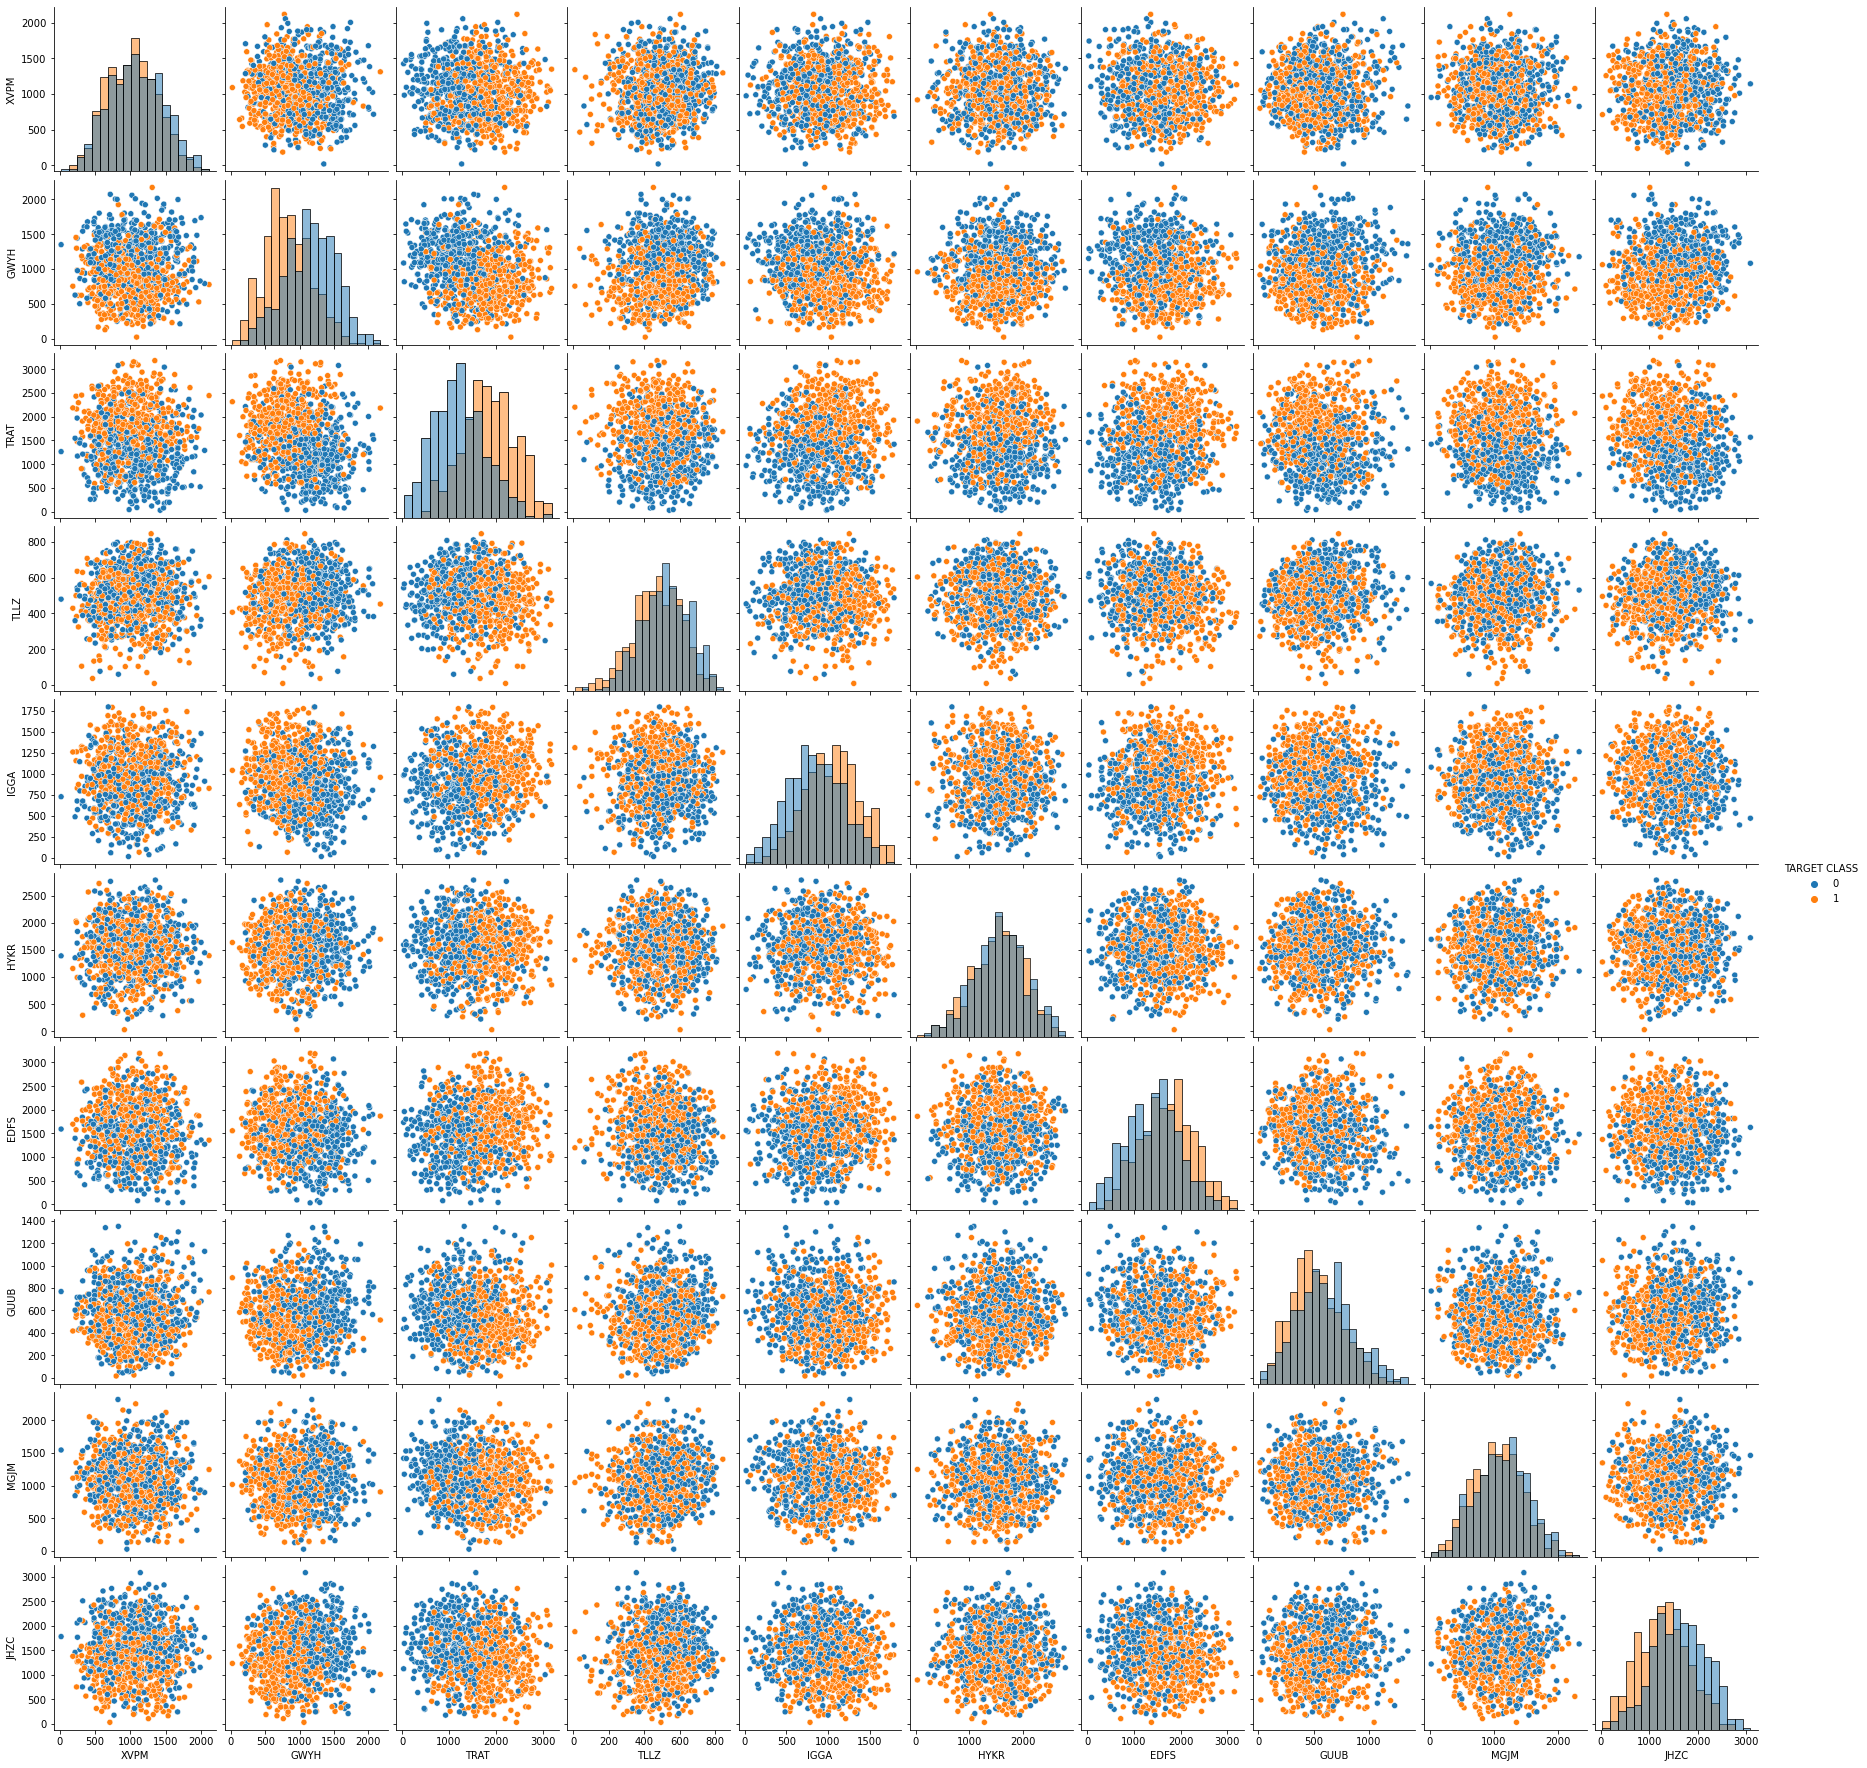

In [7]:
# Create pairplot
sns.pairplot(df,diag_kind='hist', hue = 'TARGET CLASS')
plt.show()

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [9]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)

**Fit scaler to the features.**

In [10]:
X =  pd.DataFrame(scalar.fit_transform(df.drop(["TARGET CLASS"],axis = 1),),
        columns=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA','HYKR','EDFS', 'GUUB', 'MGJM','JHZC'])
y = df['TARGET CLASS'].values
X.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

**Use the .transform() method to transform the features to a scaled version.**   
**Used both fit and transform in same line of code**

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
df1=pd.DataFrame(X)
df1.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [14]:
  knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [15]:
#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [16]:
#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
print('Accuracy for Train data set is', train_accuracy)
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)
print('Accuracy for Test  data set is', test_accuracy)

Accuracy for Train data set is 1.0
Accuracy for Test  data set is 0.74


**Create a confusion matrix and classification report.**

In [17]:
#Get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
print(y_pred)


[1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0
 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 1 1 1]


In [18]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[113,  37],
       [ 41, 109]], dtype=int64)

In [19]:
pd.DataFrame(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins_name='Total', margins=True))

Predicted    0    1  Total
Actual                    
0          113   37    150
1           41  109    150
Total      154  146    300

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score

In [21]:
# Print full classification report showing precision, recall, etc.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       150
           1       0.75      0.73      0.74       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [22]:
# Print F1-Score for both the cases
round(f1_score(y_test, y_pred, pos_label=0),3), round(f1_score(y_test, y_pred, pos_label=1),3)

(0.743, 0.736)

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [23]:
# Check and plot training and prediction accuracies to get the best K-value
# Checking only odd K-values as even values don't make sense, use K=27 as the root of elements(768) in dataset
train_acc = list()
test_acc = list()
train_error=list()
test_error=list()
n_range = np.arange(1,28,2)
for n,e in enumerate(n_range):
    knn = KNeighborsClassifier(n_neighbors=e, p=2).fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    train_error.append(1-knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
    test_error.append(1-knn.score(X_test, y_test))
    print('K = {:<2}, Train accuracy = {:.5f}, Test accuarcy = {:.5f},Train error = {:.5f}, Test error = {:.5f}'.format(e, train_acc[n], test_acc[n],train_error[n], test_error[n]))

K = 1 , Train accuracy = 1.00000, Test accuarcy = 0.74000,Train error = 0.00000, Test error = 0.26000
K = 3 , Train accuracy = 0.87286, Test accuarcy = 0.81667,Train error = 0.12714, Test error = 0.18333
K = 5 , Train accuracy = 0.85143, Test accuarcy = 0.83667,Train error = 0.14857, Test error = 0.16333
K = 7 , Train accuracy = 0.83857, Test accuarcy = 0.84667,Train error = 0.16143, Test error = 0.15333
K = 9 , Train accuracy = 0.83857, Test accuarcy = 0.86667,Train error = 0.16143, Test error = 0.13333
K = 11, Train accuracy = 0.82429, Test accuarcy = 0.85000,Train error = 0.17571, Test error = 0.15000
K = 13, Train accuracy = 0.83429, Test accuarcy = 0.84333,Train error = 0.16571, Test error = 0.15667
K = 15, Train accuracy = 0.82429, Test accuarcy = 0.85333,Train error = 0.17571, Test error = 0.14667
K = 17, Train accuracy = 0.83857, Test accuarcy = 0.84667,Train error = 0.16143, Test error = 0.15333
K = 19, Train accuracy = 0.83857, Test accuarcy = 0.85333,Train error = 0.16143, T

**Now create the following plot using the information from your for loop.**

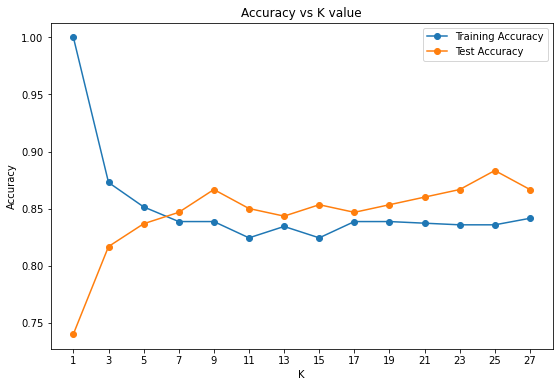

In [24]:
# Plot the elbow curve to find train/test accuracy convergence and best K-value
plt.figure(figsize=(9,6))
plt.plot(n_range, train_acc, marker='o', label="Training Accuracy")
plt.plot(n_range, test_acc, marker='o', label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.title("Accuracy vs K value")
plt.xticks(n_range)
plt.legend()
plt.show()

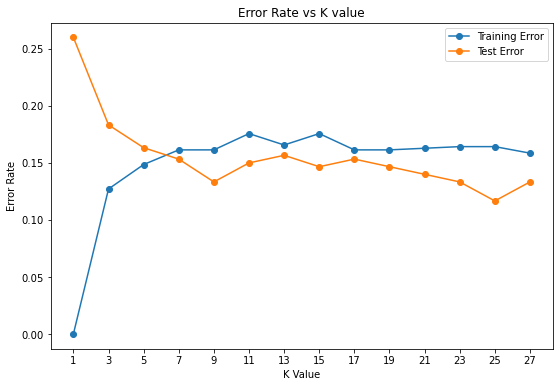

In [25]:
# Plot the elbow curve to find train/test error convergence and best K-value
plt.figure(figsize=(9,6))
plt.plot(n_range, train_error, marker='o', label="Training Error")
plt.plot(n_range, test_error, marker='o', label="Test Error")
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.title("Error Rate vs K value")
plt.xticks(n_range)
plt.legend()
plt.show()

**Choose best K value using**

In [26]:
#Check best K using sklearn
best_knn = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':range(1,27), 'p':[1, 2]}, cv=10)
best_knn.fit(X,y)
best_knn.best_score_, best_knn.best_params_
print('Optimal Score: ', best_knn.best_score_)
print('Optimal KNN parameter: ',  best_knn.best_params_)

Optimal Score:  0.835
Optimal KNN parameter:  {'n_neighbors': 19, 'p': 2}


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

**From above plot at Neighbor 9, test and train accuracy are good. s chosing 9 nenghbor and retrain with new 9 value
from CV best K vale came as 19 but i got better accuracy oat 9 from iterative looop so chosed 9 as KNN**

In [28]:
#knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9,p=2)
#Fit the model

knn.fit(X_train,y_train)

#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
print('Accuracy for Train data set is', train_accuracy)
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)
print('Accuracy for Test  data set is', test_accuracy)

Accuracy for Train data set is 0.8385714285714285
Accuracy for Test  data set is 0.8666666666666667


In [29]:
#Get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
print(y_pred)


[1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 1]


In [30]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[129,  21],
       [ 19, 131]], dtype=int64)

In [31]:
pd.DataFrame(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins_name='Total', margins=True))

Predicted    0    1  Total
Actual                    
0          129   21    150
1           19  131    150
Total      148  152    300

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       150
           1       0.86      0.87      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

